### Evaluation of 16S synthetic spike-ins for shotgun metagenomics

In [1]:
library(reshape2)
library(ggplot2)
library(ggpmisc)
library(RColorBrewer)


Attaching package: ‘ggpmisc’


The following object is masked from ‘package:ggplot2’:

    annotate




#### Loading frequency tables - Isolates

In [6]:
dfisolates <- read.csv("data/log_files_isolates_16S_references.txt",header=T, sep="\t")

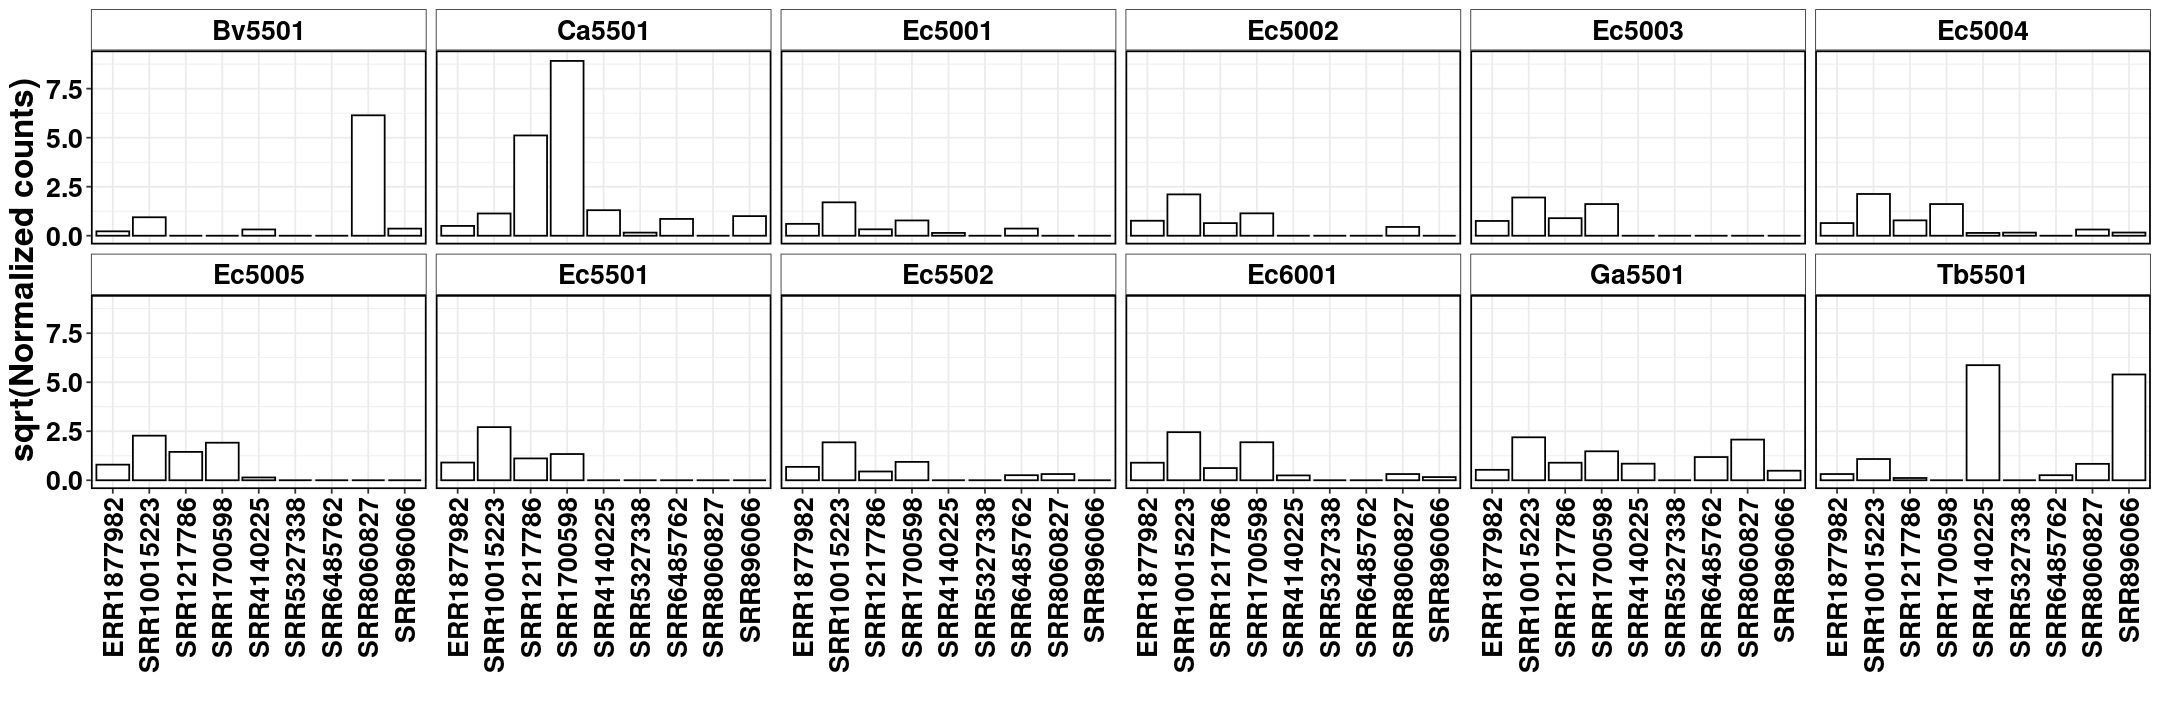

In [7]:
options(repr.plot.width=18, repr.plot.height=6)

ggplot(dfisolates, aes(x = Isolate, y = sqrt(Normalized))) +
      geom_bar(stat = "identity", color="black", fill="white") +
      #geom_boxplot(outlier.shape = NA) +
      #geom_jitter(aes(color = OTUID), size = 1.5) +
      facet_wrap(~OTUID, ncol = 6) +
      coord_cartesian(ylim=c(0, 9)) +
      labs(x = "", y = "sqrt(Normalized counts)") +
      theme_bw() + guides(fill=guide_legend(ncol=1))  +
      theme(panel.border = element_rect(colour = "black", fill=NA, size=1),
            axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 16, face = "bold", colour = "black"),
            axis.text.y = element_text(angle = 0, size = 16, face = "bold", colour = "black"),
            axis.title=element_text(size=20, face = "bold", colour = "black"),
            strip.text.x = element_text(size = 16, face = "bold", colour = "black"),
            strip.background = element_rect(fill="white"),
            legend.title=element_blank(), 
            legend.key = element_blank(),
            legend.text=element_text(size=16, face = "bold", colour = "black"))

#### Processing shotgun metagenomic data (ocean, soil, gut, saliva, and skin)

In [8]:
marinelog <- readLines("data/logfiles/marine_log50.txt")
totalReads <- gsub(" reads.*", "", marinelog[grep(" reads; of these", marinelog)])
FileName <- gsub("_.*", "", gsub(".*log50/", "", marinelog[grep("==>", marinelog)]))
percalign <- gsub("%.*", "", marinelog[grep(" overall alignment rate", marinelog)])
alignReads <- round(as.numeric(totalReads)*(as.numeric(percalign)/100))
source <- "Marine Sponge"

dfsourcesM <- data.frame(Source = source, 
                        FileName = FileName,
                        TotalReads = totalReads,
                        ReadsAlign = alignReads,
                        Percentage = percalign,
                        CPM = (as.numeric(alignReads)/as.numeric(totalReads))*1000000)

In [9]:
oceanlog <- readLines("data/logfiles/ocean_log50.txt")
totalReads <- gsub(" reads.*", "", oceanlog[grep(" reads; of these", oceanlog)])
FileName <- gsub("_.*", "", gsub(".*log50/", "", oceanlog[grep("==>", oceanlog)]))
percalign <- gsub("%.*", "", oceanlog[grep(" overall alignment rate", oceanlog)])
alignReads <- round(as.numeric(totalReads)*(as.numeric(percalign)/100))
source <- "Ocean"

dfsourcesO <- data.frame(Source = source, 
                        FileName = FileName,
                        TotalReads = totalReads,
                        ReadsAlign = alignReads,
                        Percentage = percalign,
                        CPM = (as.numeric(alignReads)/as.numeric(totalReads))*1000000)

In [10]:
soillog <- readLines("data/logfiles/soil_log50.txt")
totalReads <- gsub(" reads.*", "", soillog[grep(" reads; of these", soillog)])
FileName <- gsub("_.*", "", gsub(".*log50/", "", soillog[grep("==>", soillog)]))
percalign <- gsub("%.*", "", soillog[grep(" overall alignment rate", soillog)])
alignReads <- round(as.numeric(totalReads)*(as.numeric(percalign)/100))
source <- "Soil"

dfsourcesSo <- data.frame(Source = source, 
                        FileName = FileName,
                        TotalReads = totalReads,
                        ReadsAlign = alignReads,
                        Percentage = percalign,
                        CPM = (as.numeric(alignReads)/as.numeric(totalReads))*1000000)

In [11]:
humanlog <- readLines("data/logfiles/humangut_log50.txt")
totalReads <- gsub(" reads.*", "", humanlog[grep(" reads; of these", humanlog)])
FileName <- gsub("_.*", "", gsub(".*log50/", "", humanlog[grep("==>", humanlog)]))
percalign <- gsub("%.*", "", humanlog[grep(" overall alignment rate", humanlog)])
alignReads <- round(as.numeric(totalReads)*(as.numeric(percalign)/100))
source <- "Human Gut"

dfsourcesH <- data.frame(Source = source, 
                        FileName = FileName,
                        TotalReads = totalReads,
                        ReadsAlign = alignReads,
                        Percentage = percalign,
                        CPM = (as.numeric(alignReads)/as.numeric(totalReads))*1000000)

In [12]:
mouselog <- readLines("data/logfiles/mousegut_log50.txt")
totalReads <- gsub(" reads.*", "", mouselog[grep(" reads; of these", mouselog)])
FileName <- gsub("_.*", "", gsub(".*log50/", "", mouselog[grep("==>", mouselog)]))
percalign <- gsub("%.*", "", mouselog[grep(" overall alignment rate", mouselog)])
alignReads <- round(as.numeric(totalReads)*(as.numeric(percalign)/100))
source <- "Mouse Gut"

dfsourcesMg <- data.frame(Source = source, 
                        FileName = FileName,
                        TotalReads = totalReads,
                        ReadsAlign = alignReads,
                        Percentage = percalign,
                        CPM = (as.numeric(alignReads)/as.numeric(totalReads))*1000000)

In [13]:
salivalog <- readLines("data/logfiles/saliva_log50.txt")
totalReads <- gsub(" reads.*", "", salivalog[grep(" reads; of these", salivalog)])
FileName <- gsub("_.*", "", gsub(".*log50/", "", salivalog[grep("==>", salivalog)]))
percalign <- gsub("%.*", "", salivalog[grep(" overall alignment rate", salivalog)])
alignReads <- round(as.numeric(totalReads)*(as.numeric(percalign)/100))
source <- "Saliva"

dfsourcesSa <- data.frame(Source = source, 
                        FileName = FileName,
                        TotalReads = totalReads,
                        ReadsAlign = alignReads,
                        Percentage = percalign,
                        CPM = (as.numeric(alignReads)/as.numeric(totalReads))*1000000)

In [14]:
skinlog <- readLines("data/logfiles/skin_log50.txt")
totalReads <- gsub(" reads.*", "", skinlog[grep(" reads; of these", skinlog)])
FileName <- gsub("_.*", "", gsub(".*log50/", "", skinlog[grep("==>", skinlog)]))
percalign <- gsub("%.*", "", skinlog[grep(" overall alignment rate", skinlog)])
alignReads <- round(as.numeric(totalReads)*(as.numeric(percalign)/100))
source <- "Skin"

dfsourcesSk <- data.frame(Source = source, 
                        FileName = FileName,
                        TotalReads = totalReads,
                        ReadsAlign = alignReads,
                        Percentage = percalign,
                        CPM = (as.numeric(alignReads)/as.numeric(totalReads))*1000000)

In [15]:
dfsources <- rbind(dfsourcesM, dfsourcesO, dfsourcesSo, dfsourcesMg,
                   dfsourcesH, dfsourcesSa, dfsourcesSk)


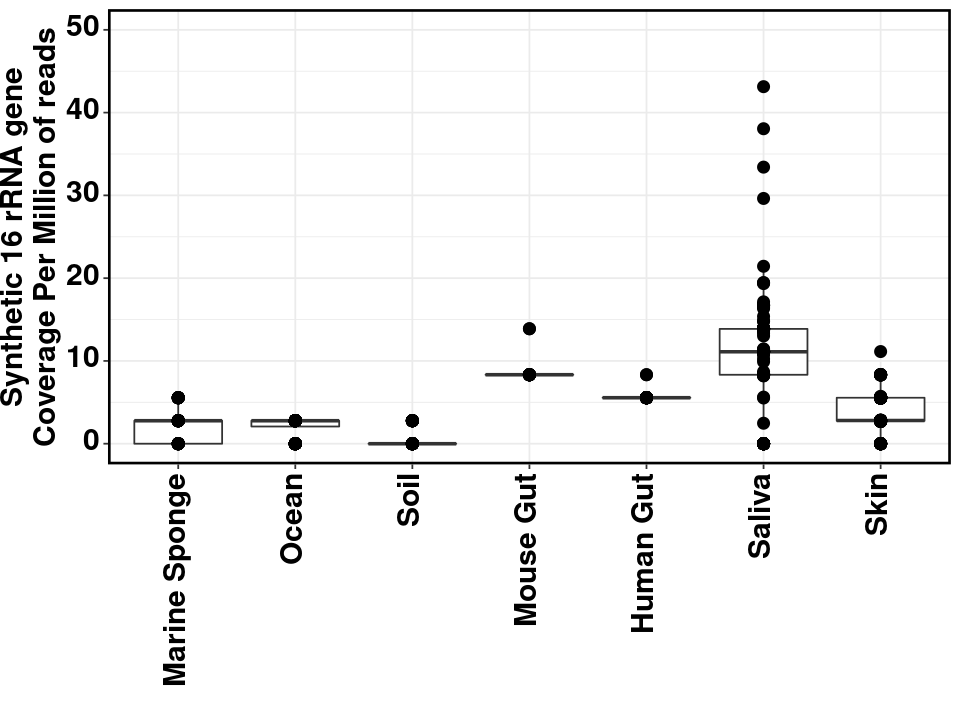

In [17]:
options(repr.plot.width=8, repr.plot.height=6)

ggplot(dfsources, aes(x=Source, y=(CPM*50/1800))) + 
  geom_boxplot(outlier.shape=NA) +
  geom_point(size = 3, shape = 19, position=position_dodge(0.75)) +
  #geom_dotplot(binaxis='y', dotsize=0.5) +
  coord_cartesian(ylim=c(0, 50)) +
  #scale_fill_brewer(palette="Dark2") + 
  labs(x = "", y = "Synthetic 16 rRNA gene\nCoverage Per Million of reads") +
  theme_bw() + 
  theme(axis.text.x = element_text(size = 18, hjust = 1,  vjust = 0.5, angle = 90, face="bold", colour = "black"),
    axis.text.y = element_text(size = 18, face="bold", colour = "black"),
    axis.text = element_text(size = 19, face="bold", colour = "black"),
    axis.title=element_text(size=18, face="bold", colour = "black"),
    plot.title = element_text(size = 18, face="bold", colour = "black"),
    strip.background =element_rect(fill="white"),
    strip.text = element_text(size = 18, face="bold", colour = "black"),
    panel.background = element_blank(),
    panel.border = element_rect(colour = "black", fill=NA, size=1.5),
    legend.title = element_text(face="bold", colour = "black", size = 20),
    legend.text = element_text(face="bold", colour = "black", size = 18))